In [1]:
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
%pylab inline
import statsmodels.api as sm
from patsy import dmatrices
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('all.csv')
df['datadate'] = pd.to_datetime(df['datadate'], format='%Y%m%d', errors='ignore').dt.to_period('D')
df = df.set_index('datadate')
#df.groupby(['gvkey','datadate'])
df2 = df.groupby(['datadate','tic'])['prccd'].sum().to_frame()
df2 = df2.unstack
df2

<bound method DataFrame.unstack of                       prccd
datadate   tic             
2020-01-02 3ARTME    0.0179
           3FRCHE    0.0001
           3LTHM     1.2500
           3NSRGY  108.1210
           3XXFPL    0.0040
...                     ...
2020-10-16 ZWH.     19.2000
           ZXM.     33.7700
           ZXM.B    35.9000
           ZYNE      3.8500
           ZZZ.     22.1700

[1048575 rows x 1 columns]>

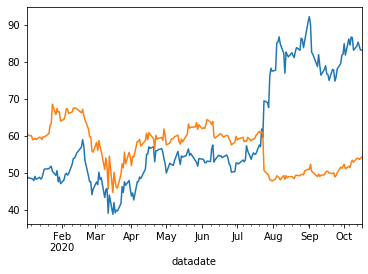

In [3]:
df[df['tic'] == 'AMD']['prccd'].plot()
df[df['tic'] == 'INTC']['prccd'].plot()

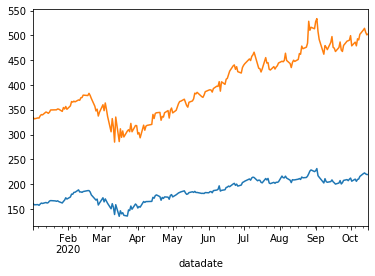

In [4]:
df[df['tic'] == 'MSFT']['prccd'].plot()
df[df['tic'] == 'ADBE']['prccd'].plot()

In [52]:
# stack and get correlations
temp = df.drop(['iid','conm','ajexdi','gvkey'],axis=1).groupby(['tic','datadate']).mean()['prccd']
temp = temp.unstack('tic')
temp
corr_table = temp.corr()
corr_table

tic,0072B,3ARTME,3CBUIF,3DANS,3FRCHE,3LTHM,3NSRGY,3QBCAF,3XXFPL,4800B,...,ZUD.,ZUQ.,ZUQ.F,ZUQ.U,ZWE.,ZWH.,ZXM.,ZXM.B,ZYNE,ZZZ.
tic,,,,,,,,,,,,,,,,,,,,,
0072B,1.000000e+00,1.026453e-01,NaN,5.215160e-02,-7.743577e-16,-7.959288e-01,-4.175575e-02,1.000000,-2.830539e-01,NaN,...,8.031961e-01,1.039848e-01,4.491972e-01,NaN,7.639355e-01,7.602779e-01,2.524420e-01,1.700019e-01,2.607672e-01,4.643601e-01
3ARTME,1.026453e-01,1.000000e+00,0.337079,1.318918e-01,-3.548782e-15,-4.800632e-01,5.088700e-01,0.341182,2.252297e-01,NaN,...,-2.342481e-02,4.511678e-01,5.012734e-03,NaN,-3.643975e-02,1.293715e-02,4.052742e-01,4.559767e-01,-3.310655e-01,3.420552e-01
3CBUIF,NaN,3.370785e-01,1.000000,9.208940e-01,NaN,NaN,7.300455e-01,NaN,-3.881370e-01,NaN,...,-4.340525e-01,9.057023e-01,8.703883e-01,NaN,-5.212269e-01,-3.597740e-01,9.295523e-01,7.621285e-01,-6.737982e-01,3.628555e-01
3DANS,5.215160e-02,1.318918e-01,0.920894,1.000000e+00,-1.123714e-15,NaN,3.473463e-01,-1.000000,1.465981e-02,NaN,...,-2.970348e-02,2.489996e-01,-1.625492e-01,NaN,1.187426e-01,-1.261593e-01,2.325681e-01,2.846739e-01,-6.083379e-02,2.465406e-01
3FRCHE,-7.743577e-16,-3.548782e-15,NaN,-1.123714e-15,1.000000e+00,3.582068e-15,3.675206e-16,NaN,3.488734e-15,NaN,...,1.986001e-15,1.439539e-14,1.488604e-14,NaN,-1.550794e-15,2.345278e-15,-1.185059e-14,9.085741e-16,4.027702e-16,-1.781995e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWH.,7.602779e-01,1.293715e-02,-0.359774,-1.261593e-01,2.345278e-15,2.118519e-01,2.594836e-01,0.562848,-1.992218e-01,NaN,...,9.895840e-01,3.979903e-01,5.163487e-01,NaN,9.664815e-01,1.000000e+00,6.429208e-01,5.084089e-01,5.114613e-01,7.515417e-01
ZXM.,2.524420e-01,4.052742e-01,0.929552,2.325681e-01,-1.185059e-14,-1.987307e-01,8.324020e-01,0.467065,2.516925e-01,NaN,...,6.035395e-01,9.173481e-01,5.983841e-01,NaN,5.931511e-01,6.429208e-01,1.000000e+00,9.755351e-01,1.727662e-01,8.996102e-01
ZXM.B,1.700019e-01,4.559767e-01,0.762129,2.846739e-01,9.085741e-16,-2.329339e-01,8.870779e-01,0.413245,3.169368e-01,NaN,...,4.682841e-01,9.417484e-01,6.737633e-01,NaN,4.548210e-01,5.084089e-01,9.755351e-01,1.000000e+00,7.266694e-02,8.602903e-01


In [69]:
s = corr_table.unstack()
so = s.sort_values(kind="quicksort", ascending = False)
so_what = so[so > .8]
so_no = so_what[so_what < .9]
so_no[:50]

tic       tic     
PWF.PR.F  ACWF        0.900000
ACWF      PWF.PR.F    0.900000
PRAH      GPC         0.900000
GPC       PRAH        0.900000
ENB.PF.A  TLRA        0.900000
TLRA      ENB.PF.A    0.900000
WPP       ENB.        0.900000
ENB.      WPP         0.900000
ERF.      LRCDF       0.900000
LRCDF     ERF.        0.900000
QVM       KEQU        0.900000
KEQU      QVM         0.900000
PZC.      SYLD        0.900000
SYLD      PZC.        0.900000
APH       GWO.PR.T    0.900000
GWO.PR.T  APH         0.900000
NTIC      IDOG        0.900000
IDOG      NTIC        0.900000
VBF       AMH.PH      0.900000
AMH.PH    VBF         0.900000
AIR       BAM.PR.S    0.899999
BAM.PR.S  AIR         0.899999
QEFA      BHR.PB      0.899999
BHR.PB    QEFA        0.899999
DLX       HCG.        0.899999
HCG.      DLX         0.899999
BKH       ADDC        0.899999
ADDC      BKH         0.899999
KF        FNJN        0.899999
FNJN      KF          0.899999
CDUAF     TPYP        0.899999
TPYP      CDUAF     

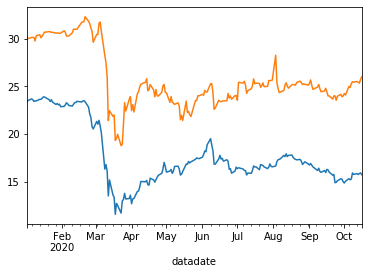

In [70]:
df[df['tic'] == 'TPYP']['prccd'].plot()
df[df['tic'] == 'CDUAF']['prccd'].plot()

In [15]:
data = pd.read_csv('CRSP.csv')
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d', errors='ignore').dt.to_period('D')
#data = data.set_index('date')
data['date'].sort_values()
data

,PERMNO,date,EXCHCD,TICKER,COMNAM,BIDLO,ASKHI,PRC,VOL,BID,ASK,OPENPRC
0,10026,2019-01-02,3,JJSF,J & J SNACK FOODS CORP,139.12000,144.03999,141.00000,112825.0,140.75999,141.00000,143.42000
1,10026,2019-01-03,3,JJSF,J & J SNACK FOODS CORP,140.27000,145.91000,143.02000,84331.0,143.02000,143.45000,140.60001
2,10026,2019-01-04,3,JJSF,J & J SNACK FOODS CORP,143.16479,147.36501,144.84000,88233.0,144.84000,145.06000,144.19000
3,10026,2019-01-07,3,JJSF,J & J SNACK FOODS CORP,142.83000,147.87000,145.41000,79539.0,145.20000,145.41000,144.37000
4,10026,2019-01-08,3,JJSF,J & J SNACK FOODS CORP,145.50000,149.30231,148.70000,70200.0,148.28000,148.70000,146.14999
...,...,...,...,...,...,...,...,...,...,...,...,...
1389041,93436,2019-12-24,3,TSLA,TESLA INC,412.68750,425.47000,425.25000,8186207.0,425.10001,425.19000,418.35999
1389042,93436,2019-12-26,3,TSLA,TESLA INC,426.35001,433.48001,430.94000,10617605.0,430.82001,430.92001,427.91000
1389043,93436,2019-12-27,3,TSLA,TESLA INC,426.10999,435.31000,430.38000,9936455.0,430.20001,430.35001,435.00000
1389044,93436,2019-12-30,3,TSLA,TESLA INC,409.25891,429.00000,414.70001,12563586.0,414.62000,414.67999,428.79001


In [10]:
data['Price Adjusted'] = data['PRC'] / data['CFACPR']
data['Shares Adjusted'] = (data['SHROUT'] * data['CFACSHR']) * 1000
data

,PERMNO,TICKER,COMNAM,FACPR,FACSHR,BIDLO,ASKHI,PRC,BID,ASK,SHROUT,CFACPR,CFACSHR,Price Adjusted,Shares Adjusted
date,,,,,,,,,,,,,,,
2007-01-03,10107,MSFT,MICROSOFT CORP,NaN,NaN,29.400,30.2500,29.86,29.88,29.88,9777000,1.0,1,29.86,9777000000
2007-01-04,10107,MSFT,MICROSOFT CORP,NaN,NaN,29.440,29.9700,29.81,29.82,29.82,9777000,1.0,1,29.81,9777000000
2007-01-05,10107,MSFT,MICROSOFT CORP,NaN,NaN,29.450,29.7500,29.64,29.64,29.65,9777000,1.0,1,29.64,9777000000
2007-01-08,10107,MSFT,MICROSOFT CORP,NaN,NaN,29.530,30.1000,29.93,29.95,29.95,9777000,1.0,1,29.93,9777000000
2007-01-09,10107,MSFT,MICROSOFT CORP,NaN,NaN,29.730,30.1800,29.96,29.96,29.97,9777000,1.0,1,29.96,9777000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,92614,AWK,AMERICAN WATER WORKS CO INC,NaN,NaN,120.780,122.0200,121.62,121.64,121.72,180776,1.0,1,121.62,180776000
2019-12-26,92614,AWK,AMERICAN WATER WORKS CO INC,NaN,NaN,121.410,122.2865,121.88,121.88,121.89,180776,1.0,1,121.88,180776000
2019-12-27,92614,AWK,AMERICAN WATER WORKS CO INC,NaN,NaN,121.810,122.9700,122.96,122.93,122.96,180776,1.0,1,122.96,180776000
